## Практическое задание

  1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston. 
  2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

  3. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

  1-2. (*)  Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews .Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [3]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
data = boston_dataset.data
target = boston_dataset.target
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.20)

In [5]:
print(f'train_data.shape={train_data.shape} test_data.shape={test_data.shape}\
\n train_target.shape={train_target.shape} test_target.shape={test_target.shape}')

train_data.shape=(404, 13) test_data.shape=(102, 13)
 train_target.shape=(404,) test_target.shape=(102,)


Нормализуем признаки

In [6]:
scaler = MinMaxScaler((-1,1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [7]:
train_data

array([[-0.99272788, -1.        ,  0.56666667, ...,  0.82978723,
         0.95836503, -0.26600442],
       [-0.99888277, -1.        , -0.87259259, ...,  0.10638298,
         0.97834576, -0.84988962],
       [-0.8980419 , -1.        ,  0.28592593, ...,  0.61702128,
         0.88670825, -0.66556291],
       ...,
       [-0.99620703, -1.        , -0.61333333, ...,  0.40425532,
         0.98240276, -0.53642384],
       [-0.99930179, -1.        , -0.67037037, ...,  0.61702128,
         0.96196562, -0.72295806],
       [-0.98159062, -0.6       , -0.76074074, ..., -0.91489362,
         0.98235205, -0.47461369]])

У нас на входе 13 признаков
</br>
На выходе 1 предсказываемое значение

In [67]:
model1 = Sequential([
    Dense(20, activation='relu', input_shape=(13,)),
    Dense(13, activation='relu'),
    Dense(1, activation='relu')
])

model1.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=[
        'MeanSquaredLogarithmicError',        
    ]
)

model1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_163 (Dense)            (None, 20)                280       
_________________________________________________________________
dense_164 (Dense)            (None, 13)                273       
_________________________________________________________________
dense_165 (Dense)            (None, 1)                 14        
Total params: 567
Trainable params: 567
Non-trainable params: 0
_________________________________________________________________


In [68]:
hh = model1.fit(train_data, train_target, epochs=20, batch_size=1, 
                validation_split=0.2
)

Epoch 1/20
323/323 [==============================] - 1s 2ms/step - loss: 402.6922 - mean_squared_logarithmic_error: 4.1897 - val_loss: 77.9846 - val_mean_squared_logarithmic_error: 0.1245
Epoch 2/20
323/323 [==============================] - 0s 1ms/step - loss: 66.9871 - mean_squared_logarithmic_error: 0.1008 - val_loss: 52.4391 - val_mean_squared_logarithmic_error: 0.0758
Epoch 3/20
323/323 [==============================] - 0s 1ms/step - loss: 49.1756 - mean_squared_logarithmic_error: 0.0733 - val_loss: 36.0660 - val_mean_squared_logarithmic_error: 0.0505
Epoch 4/20
323/323 [==============================] - 0s 1ms/step - loss: 36.2708 - mean_squared_logarithmic_error: 0.0549 - val_loss: 26.0532 - val_mean_squared_logarithmic_error: 0.0395
Epoch 5/20
323/323 [==============================] - 0s 1ms/step - loss: 29.2485 - mean_squared_logarithmic_error: 0.0467 - val_loss: 21.6249 - val_mean_squared_logarithmic_error: 0.0386
Epoch 6/20
323/323 [==============================] - 0s 1m

In [69]:
y_test_pred = model1.predict(test_data)
r2_score(test_target, y_test_pred)

0.8487930406839111

In [71]:
def create_fit_model(layers_numb, epochs_numb, 
                     neuron_numb_list, val_optimizer):

  # Build the model.
  # neuron_numb_list = []
  model = Sequential(name='my_model')
  model.add(Dense(20, activation='relu', input_shape=(13,)))
  for k in range(layers_numb):
    # neuron_numb = 20+(10-k)*10
    # neuron_numb_list.append(neuron_numb)
    neuron_numb = neuron_numb_list[k]
    print(f'Слой {k} кол-во нейронов {neuron_numb}')
    model.add(Dense(20, activation='relu'))

  model.add(Dense(1, activation='relu')) 

  # Compile the model.
  model.compile(      
      optimizer = val_optimizer,      
      loss = 'mean_squared_error',      
      metrics=['MeanSquaredLogarithmicError',])

  # Train the model.
  hh = model.fit(train_data, train_target, epochs=epochs_numb, batch_size=1, 
                validation_split=0.2)
  
  y_test_pred = model.predict(test_data)
  r2score = r2_score(test_target, y_test_pred)
   
  return hh, model, r2score

In [72]:
def test_params(params, title):
  results = {
      'r2 score': [],
  }

  plt.figure(figsize=(16,7))
  plt2.figure(figsize=(16,7))

  for index, param in params.iterrows():
    print(f'index={index}')
    hh, model, r2score = create_fit_model(param['layers_numb'], 
                    param['epochs_numb'], param['neuron_numb_list'],
                    param['optimizer'])
    
    plt.plot(hh.history['val_loss'], '-', label=f'val_{index}')
    plt.plot(hh.history['loss'], '--', label=f'train_{index}')


    # plt.plot(r2score, '-', label='r2_score')
    results['r2 score'].append(r2score)
    
  plt.legend()
  plt.xlabel('epoch')
  plt.ylabel('mean_squared_error')
  plt.title(title)
  plt.grid()
  plt.show()

  return results

index=0
Слой 0 кол-во нейронов 20
Epoch 1/15
323/323 [==============================] - 1s 2ms/step - loss: 261.5417 - mean_squared_logarithmic_error: 1.7893 - val_loss: 61.1858 - val_mean_squared_logarithmic_error: 0.1002
Epoch 2/15
323/323 [==============================] - 0s 1ms/step - loss: 57.1056 - mean_squared_logarithmic_error: 0.0839 - val_loss: 41.1941 - val_mean_squared_logarithmic_error: 0.0598
Epoch 3/15
323/323 [==============================] - 0s 1ms/step - loss: 41.6122 - mean_squared_logarithmic_error: 0.0598 - val_loss: 27.9895 - val_mean_squared_logarithmic_error: 0.0445
Epoch 4/15
323/323 [==============================] - 0s 1ms/step - loss: 30.8107 - mean_squared_logarithmic_error: 0.0468 - val_loss: 20.7927 - val_mean_squared_logarithmic_error: 0.0396
Epoch 5/15
323/323 [==============================] - 0s 1ms/step - loss: 24.7380 - mean_squared_logarithmic_error: 0.0431 - val_loss: 18.2119 - val_mean_squared_logarithmic_error: 0.0404
Epoch 6/15
323/323 [=====

<Figure size 1152x504 with 0 Axes>

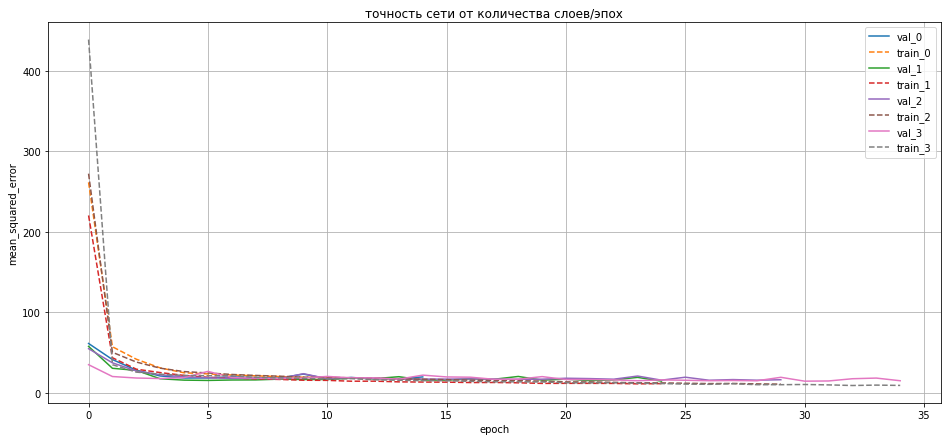

,r2 score
0,0.802202
1,0.871787
2,0.855283
3,0.863520


In [73]:
params_dict = {'layers_numb': [1, 2, 1, 2], 
     'epochs_numb': [15, 25, 30, 35], 
     'neuron_numb_list': [
                          [20],
                          [20, 20],
                          [20],
                          [20, 20]
                          ],
      'optimizer': ['Adam', 'Adam', 'Adam', 'Adam']}

params = pd.DataFrame(data=params_dict)
results = test_params(params, 'точность сети от количества слоев/эпох')

df_res_models = pd.DataFrame(data=results)
df_res_models 

По графику видно что в районе после 10ой эпохи потери снижаются не значительно. По таблице r2 score видно что 2ой вариант самый удачный(0.871787), попробую увеличить кол-во нейронов и эпох остальное из 2ой настройки

index=0
Слой 0 кол-во нейронов 22
Слой 1 кол-во нейронов 21
Epoch 1/25
323/323 [==============================] - 1s 2ms/step - loss: 230.7369 - mean_squared_logarithmic_error: 1.8849 - val_loss: 40.9950 - val_mean_squared_logarithmic_error: 0.0592
Epoch 2/25
323/323 [==============================] - 0s 1ms/step - loss: 43.0519 - mean_squared_logarithmic_error: 0.0650 - val_loss: 25.8035 - val_mean_squared_logarithmic_error: 0.0399
Epoch 3/25
323/323 [==============================] - 0s 2ms/step - loss: 29.9309 - mean_squared_logarithmic_error: 0.0467 - val_loss: 17.4854 - val_mean_squared_logarithmic_error: 0.0292
Epoch 4/25
323/323 [==============================] - 1s 2ms/step - loss: 23.3920 - mean_squared_logarithmic_error: 0.0398 - val_loss: 17.6972 - val_mean_squared_logarithmic_error: 0.0306
Epoch 5/25
323/323 [==============================] - 0s 2ms/step - loss: 21.3189 - mean_squared_logarithmic_error: 0.0390 - val_loss: 16.1717 - val_mean_squared_logarithmic_error: 0.0280

<Figure size 1152x504 with 0 Axes>

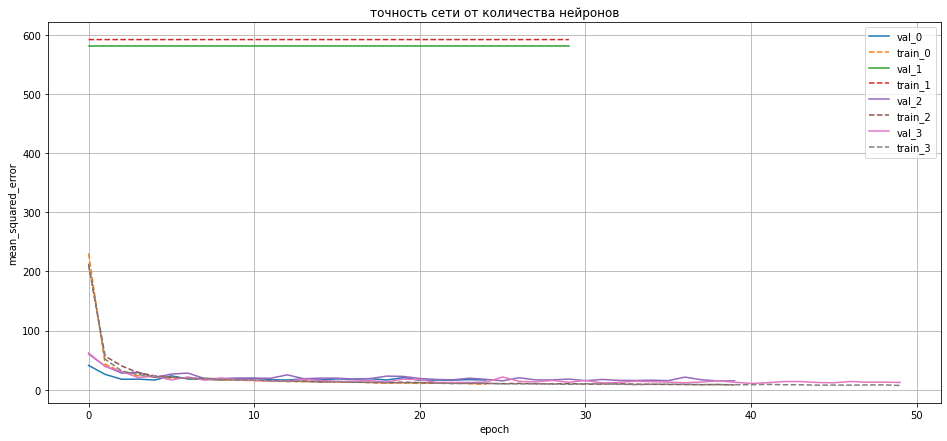

,r2 score
0,0.865076
1,-6.857716
2,0.882378
3,0.877529


In [75]:
params_dict = {'layers_numb': [2, 2, 2, 2], 
     'epochs_numb': [25, 30, 40, 50], 
     'neuron_numb_list': [
                          [22, 21],
                          [22, 21],
                          [22, 21],
                          [22, 21]
                          ],
      'optimizer': ['Adam', 'Adam', 'Adam', 'Adam']}

params = pd.DataFrame(data=params_dict)
results = test_params(params, 'точность сети от количества нейронов')

df_res_models = pd.DataFrame(data=results)
df_res_models

Модель периодически ведет себя непонятно, это видно по 2 настройке, при этом видно что 3й вариант показал отличные рез-ты

Ознакомился с документацией tensorflow при выборе activations, metrics, optimizers, все подборы не стал тут отражать, блокнот бы вышел крайне большим.